In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
dataset=pd.read_csv("C:\\Users\\Hi\\Downloads\\diabetes.csv")

In [6]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data preprocessing

In [7]:
## Handling missing values

dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
for i in dataset.columns:
    print("************************",i,"*****************")
    print()
    print(set(dataset[i].tolist()))
    print()

************************ Pregnancies *****************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

************************ Glucose *****************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}

************************ BloodPressure *****************

{0, 24, 30, 38, 40, 44, 46, 48, 50, 52, 54, 55, 56, 58, 60, 61, 62, 64, 65, 66, 68, 70, 72, 74, 75, 76, 78, 80, 82, 84, 85, 86, 88,

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


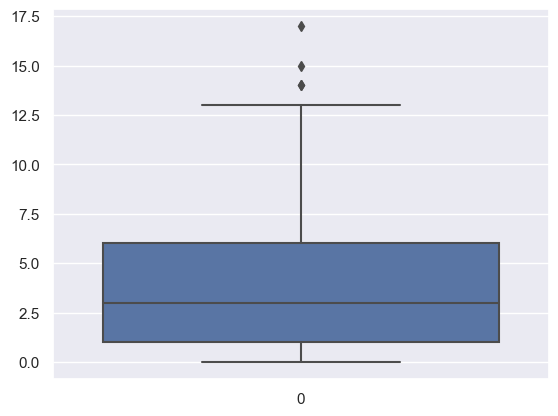

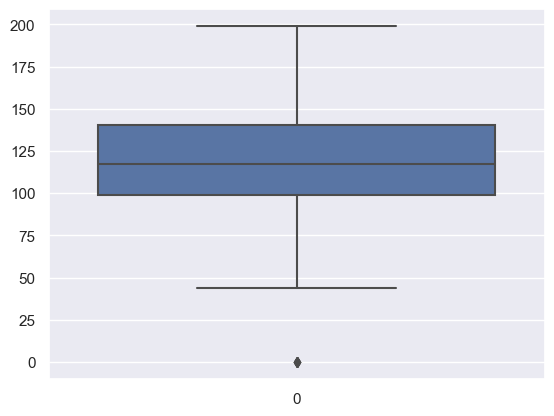

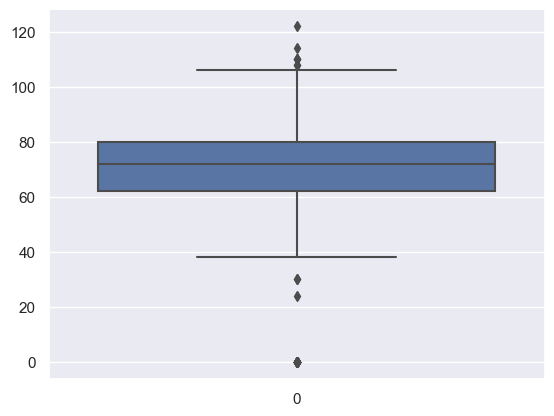

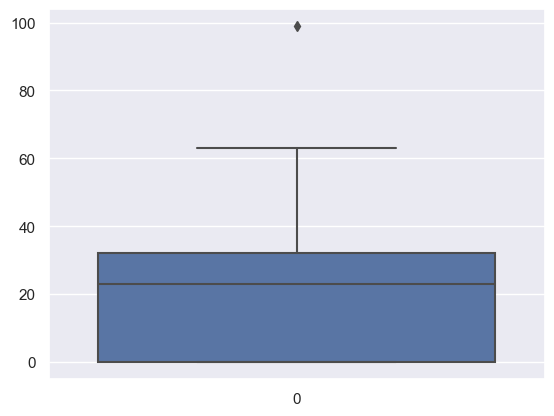

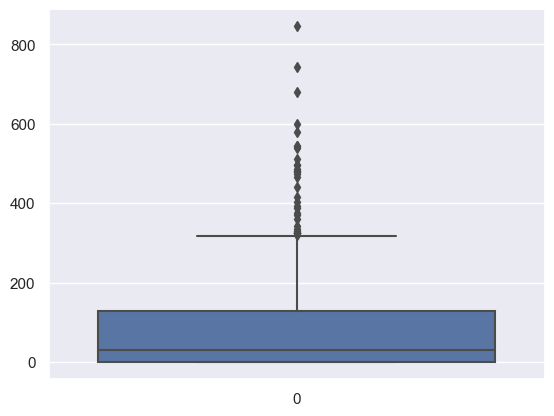

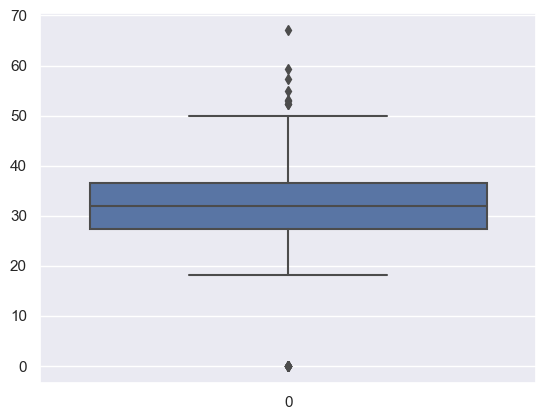

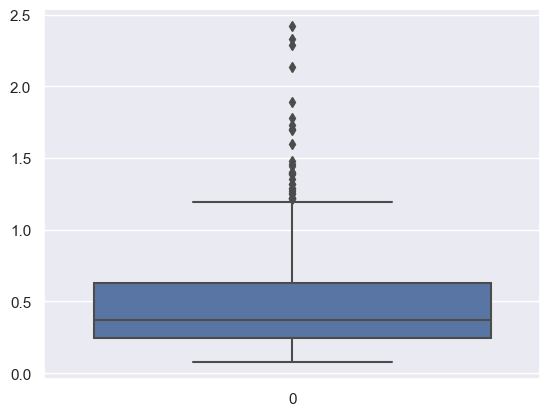

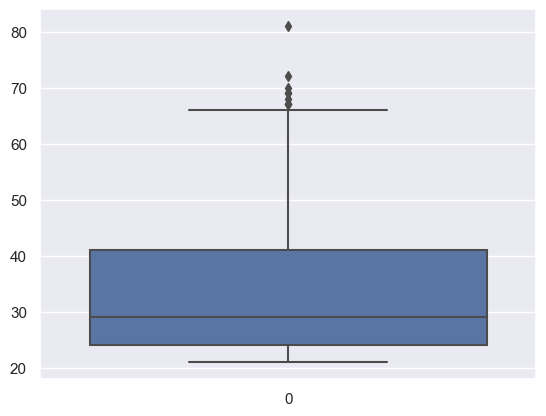

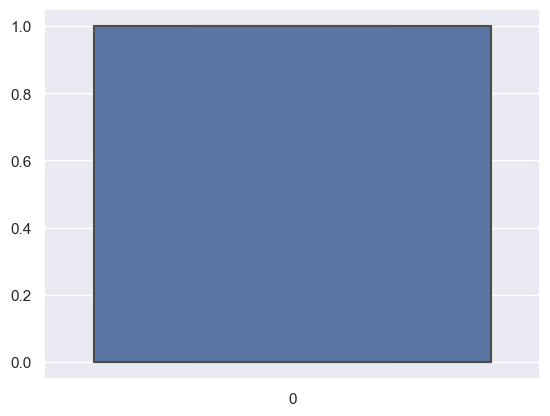

In [12]:
## Checking for outliers

def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object'])[0:]):
    boxplots(i)

In [14]:
dataset['Glucose'] = np.where(dataset['Glucose']==0,dataset['Glucose'].median(),dataset['Glucose'])
dataset['BloodPressure'] = np.where(dataset['BloodPressure']==0,dataset['BloodPressure'].median(),dataset['BloodPressure'])
dataset['SkinThickness'] = np.where(dataset['SkinThickness']==0,dataset['SkinThickness'].median(),dataset['SkinThickness'])
dataset['Insulin'] = np.where(dataset['Insulin']==0,dataset['Insulin'].median(),dataset['Insulin'])
dataset['BMI'] = np.where(dataset['BMI']==0,dataset['BMI'].median(),dataset['BMI'])

In [15]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
x = dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]

In [19]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [17]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
## Balance the data by using Smote Tech
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

print("Before SMOTE :" ,y.value_counts())
print()
print("After SMOTE :" ,y_smote.value_counts())



Before SMOTE : 0    500
1    268
Name: Outcome, dtype: int64

After SMOTE : 1    500
0    500
Name: Outcome, dtype: int64


In [23]:
## Split the data

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size =0.25,random_state=1,stratify=y_smote)

In [24]:
## Bagging classifier

bagging = BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [25]:
y_pred_bagg_train = bagging.predict(x_train)
y_pred_bagg_test = bagging.predict(x_test)

In [26]:
##Evaluation

print(classification_report(y_train,y_pred_bagg_train))
print()
print(classification_report(y_test,y_pred_bagg_test))      

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       375
           1       0.99      0.99      0.99       375

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750


              precision    recall  f1-score   support

           0       0.75      0.77      0.76       125
           1       0.76      0.74      0.75       125

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [30]:
from sklearn.tree import plot_tree

In [32]:
bagging.estimators_

[DecisionTreeClassifier(random_state=1852876676),
 DecisionTreeClassifier(random_state=609829292),
 DecisionTreeClassifier(random_state=1668841318),
 DecisionTreeClassifier(random_state=453439319),
 DecisionTreeClassifier(random_state=2002522382),
 DecisionTreeClassifier(random_state=637365346),
 DecisionTreeClassifier(random_state=755490162),
 DecisionTreeClassifier(random_state=477071495),
 DecisionTreeClassifier(random_state=827184343),
 DecisionTreeClassifier(random_state=1892655172)]

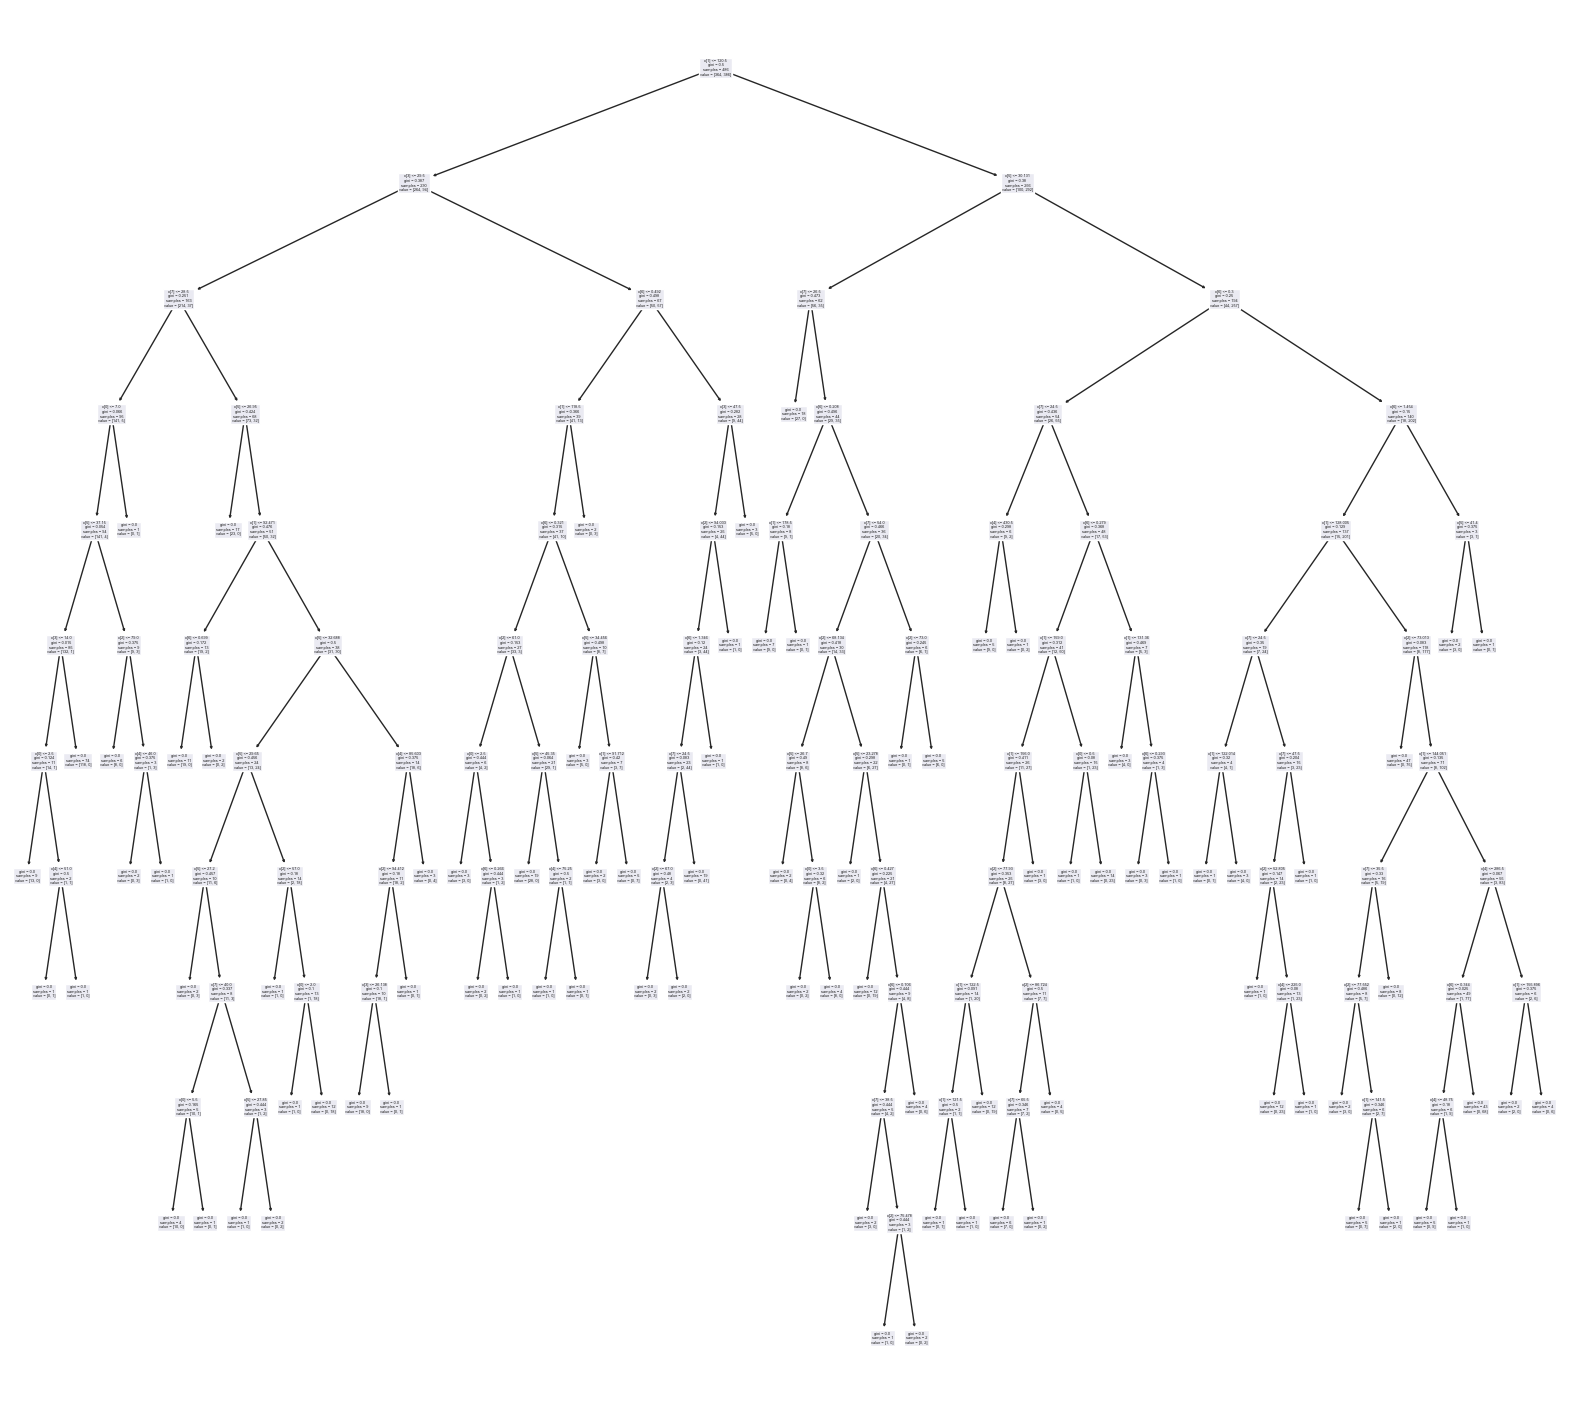

In [33]:
plt.figure(figsize = (20,18))
plot_tree(bagging.estimators_[0])
plt.show()

In [40]:
rf = RandomForestClassifier(n_estimators=500,criterion='entropy',max_features = 2,max_depth=2)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=2,
                       n_estimators=500)

In [46]:
rf.feature_importances_

array([0.03484663, 0.32265134, 0.04558992, 0.05503931, 0.05774876,
       0.23288254, 0.07169018, 0.17955132])

In [41]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [42]:
##Evaluation

print(classification_report(y_train,y_pred_rf_train))
print()
print(classification_report(y_test,y_pred_rf_test))  

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       375
           1       0.80      0.84      0.82       375

    accuracy                           0.81       750
   macro avg       0.81      0.81      0.81       750
weighted avg       0.81      0.81      0.81       750


              precision    recall  f1-score   support

           0       0.77      0.71      0.74       125
           1       0.73      0.78      0.76       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250



## Cross validation

In [43]:
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rf,x_test,y_test,cv=10)
test_accuracy

array([0.76, 0.72, 0.8 , 0.6 , 0.88, 0.8 , 0.8 , 0.76, 0.88, 0.68])

In [44]:
print("Test mean accuracy :",test_accuracy.mean())

print("Test max accuracy :",test_accuracy.max())

Test mean accuracy : 0.768
Test max accuracy : 0.88


### Building model with scaled data

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [47]:
## Split the data

x_train,x_test,y_train,y_test = train_test_split(sc_x,y,test_size =0.25,random_state=1,stratify=y)

In [52]:
rf1 = RandomForestClassifier(max_features = 4)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_features=4)

In [53]:
y_pred_rf1_train = rf1.predict(x_train)
y_pred_rf1_test = rf1.predict(x_test)

In [54]:
##Evaluation

print(classification_report(y_train,y_pred_rf1_train))
print()
print(classification_report(y_test,y_pred_rf1_test))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       201

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       125
           1       0.66      0.58      0.62        67

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.75      0.75       192



In [55]:
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rf1,x_test,y_test,cv=10)
test_accuracy

array([0.85      , 0.5       , 0.89473684, 0.68421053, 0.73684211,
       0.89473684, 0.73684211, 0.78947368, 0.57894737, 0.73684211])

In [56]:
print("Test mean accuracy :",test_accuracy.mean())

print("Test max accuracy :",test_accuracy.max())

Test mean accuracy : 0.7402631578947367
Test max accuracy : 0.8947368421052632
